### Student Information
Name: 王姿勻

Student ID: 111020024

GitHub ID: @chiw4n

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

## Second Part
- It contains two inconsist target lable columns: sentiment and label.
- For the homework, you may choose either column to generate your outcome—both options are acceptable.
- The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary.

### Data Preparation

In [396]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [397]:
### Begin Assignment Here
# test code for environment setup
import sys
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
import PAMI
import umap
import helpers.data_mining_helpers as dmh

categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
# twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
df_stock = pd.read_csv('newdataset/Reddit-stock-sentiment.csv')

df_stock[0:3]

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0


In [398]:
print(df_stock['type'].unique())
df_stock['subreddit'].value_counts()

['comment' 'post']


subreddit
stocks              274
StockMarket         250
stockstobuytoday    174
wallstreetbets      149
Name: count, dtype: int64

### Data Transformation

In [399]:
# query
df_stock.loc[2:5,['subreddit','title','text']]

,subreddit,title,text
2,StockMarket,How do you feel about a sitting president maki...,Seeing lots of red in the ticker.
3,stockstobuytoday,Who knows more? $VMAR,Vision Marine Technologies Inc. is rewriting t...
4,StockMarket,The Trump administration is begging Xi Jinping...,He didn’t say thank you.
5,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,"Hoping to ejaculate in wet warm puss tonight, ..."


### Data Mining

dealing with missing values

In [400]:
df_stock.isnull()

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
843,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
844,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
845,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False


In [401]:
X = df_stock.isnull().apply(lambda x: dmh.check_missing_values(x))
X
#cond = X[1:2].values.flatten() > 0
#X.columns[cond]

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0,0,0,0,783,783,0,0,0,0,0,0


In [402]:
df_stock.isnull().apply(lambda x: dmh.check_missing_values(x),axis=1)

0      (The amoung of missing records is: , 2)
1      (The amoung of missing records is: , 2)
2      (The amoung of missing records is: , 2)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 2)
                        ...                   
842    (The amoung of missing records is: , 2)
843    (The amoung of missing records is: , 2)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 2)
846    (The amoung of missing records is: , 2)
Length: 847, dtype: object

In [403]:
# drop the records with missing values 
df_clean = df_stock.dropna(inplace = False)
df_clean

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
48,post,2025-04-02 13:00:42,1jpnz8b,stockstobuytoday,Earnings for current week,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.00,\r\n\r\n [MarketWatch: Stock Market News - Fi...,0.000000,0.000000,0.0,"['Stock', 'MarketWatch', 'catalyst', 'stockbuy...",0.0
63,post,2025-03-01 10:00:42,1j0w73o,stocks,Rate My Portfolio - r/Stocks Quarterly Thread ...,AutoModerator,https://www.reddit.com/r/stocks/comments/1j0w7...,79,4.0,0.95,Please use this thread to discuss your portfol...,0.368030,0.176667,1.0,"['Business', 'learn', 'Finviz', '/', 'broker',...",0.0
70,post,2025-03-29 18:14:28,1jmshlc,stockstobuytoday,FINRA Daily Shorts Data,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.00,Updated Daily by EOD\r\n\r\n \r\n[Daily Short...,0.100000,0.000000,0.0,"['EOD', 'Daily', 'Shorts', ']', '[']",0.0
72,post,2025-04-04 6:25:04,1jr5ag5,stockstobuytoday,Spending first $250 tmmw on stocks,Alarmed_Champion_913,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.00,"A lot of stocks are down right now, and I'm th...",0.347959,0.005102,1.0,"['cuz', 'OPTT', 'BLGO', 'im', 'money', 'idea',...",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783,post,2025-03-31 13:54:38,1jo3qsz,stockstobuytoday,Gappers (Up/Down),saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.00,Gappers for today\r\n\r\n [Gappers (stockbuyve...,0.000000,0.000000,0.0,"['Gappers', 'stockbuyvest.com', ']', 'today', ...",0.0
786,post,2025-04-03 12:30:39,1jqh5xb,stockstobuytoday,Analyst Recommendations,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.00,"Upgrades, Downgrades\r\n\r\n [Stock Analyst Re...",0.000000,0.000000,0.0,"['Analyst', 'Nasdaq', 'Stock', 'Upgrades', 'Do...",0.0
802,post,2025-04-02 13:54:36,1jpp50o,stockstobuytoday,Gappers (Up/Down),saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.00,Gappers for today\r\n\r\n [Gappers (stockbuyve...,0.000000,0.000000,0.0,"['Gappers', 'stockbuyvest.com', ']', 'today', ...",0.0
836,post,2025-03-26 12:18:30,1jkadvn,stockstobuytoday,Futures Market,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.00,how does the futures market look today\r\n\r\n...,0.377083,0.062500,1.0,"['Natural', 'stockbuyvest.com', 'Gold', 'marke...",0.0


In [404]:
df_stock['type'].value_counts()
# So only records with 'type' = 'post' have upvotes & downvotes; therefore, upvote_ratio can be calculated.

type
comment    783
post        64
Name: count, dtype: int64

Dealing with duplicate data. It depends on your criteria for what is considered as a duplicate record and also what type of data you are dealing with.

In [405]:
print(sum(df_clean.duplicated()))
print(sum(df_stock.duplicated()))

0
0


In [406]:
sum(df_stock.duplicated('post_id'))

0

In [407]:
X = df_stock[df_stock.duplicated([x for x in df_stock.columns if not x in ['datetime','post_id','url']])]
display(X[ X['author'] == 'AutoModerator'])

X.loc[[432,595]]['url']
print(X.loc[432]['url'])
print(X.loc[595]['url'])
# It seems like the 2 reddit posts have the same content

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
432,post,2025-04-11 16:01:14,1jwtejt,stockstobuytoday,Crypto Gainers - Coinbase,AutoModerator,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.0,"&#x200B;\r\n\r\n [Cryptocurrency Prices, Chart...",0.0,0.0,0.0,"[']', 'Daily', 'Charts', 'PEPEUSD', 'Prices', ...",0.0
595,post,2025-03-31 16:00:55,1jo6nzr,stockstobuytoday,Crypto Gainers - Coinbase,AutoModerator,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.0,"&#x200B;\r\n\r\n [Cryptocurrency Prices, Chart...",0.0,0.0,0.0,"[']', 'Daily', 'Charts', 'PEPEUSD', 'Prices', ...",0.0
679,post,2025-03-29 16:00:54,1jmphcr,stockstobuytoday,Crypto Gainers - Coinbase,AutoModerator,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.0,"&#x200B;\r\n\r\n [Cryptocurrency Prices, Chart...",0.0,0.0,0.0,"[']', 'Daily', 'Charts', 'PEPEUSD', 'Prices', ...",0.0
680,post,2025-04-07 9:01:48,1jtgtfv,stockstobuytoday,World Markets,AutoModerator,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.0,\r\n\r\n [World Markets (stockbuyvest.com)](),0.0,0.0,0.0,"[']', 'World', 'stockbuyvest.com', 'Markets']",0.0
712,post,2025-04-01 9:01:38,1jor3aj,stockstobuytoday,World Markets,AutoModerator,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.0,\r\n\r\n [World Markets (stockbuyvest.com)](),0.0,0.0,0.0,"[']', 'World', 'stockbuyvest.com', 'Markets']",0.0
717,post,2025-03-26 16:01:01,1jkf91n,stockstobuytoday,Crypto Gainers - Coinbase,AutoModerator,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.0,"&#x200B;\r\n\r\n [Cryptocurrency Prices, Chart...",0.0,0.0,0.0,"[']', 'Daily', 'Charts', 'PEPEUSD', 'Prices', ...",0.0


https://www.reddit.com/r/stockstobuytoday/comments/1jwtejt/crypto_gainers_coinbase/
https://www.reddit.com/r/stockstobuytoday/comments/1jo6nzr/crypto_gainers_coinbase/


In [408]:
len(X[ X['type'] == 'comment'])

0

In [409]:
# drop duplicated records, where 'datetime', 'post_id', 'url' are not considered.
df_unique = df_stock.drop_duplicates([x for x in df_stock.columns if not x in ['datetime','post_id','url']],
                                     keep = 'first',
                                    inplace = False).copy()
print(len(df_unique))
df_unique[:5]

826


,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0


### Data preprocessing
- Aggregation
- Sampling
- Dimensionality Reduction
- Feature Subset Selection
- Feature Creation
- Discretization and Binarization
- Attribute Transformation

#### Sampling

In [410]:
import matplotlib.pyplot as plt
%matplotlib inline
df_sample = df_stock.sample(n=500,random_state=42)

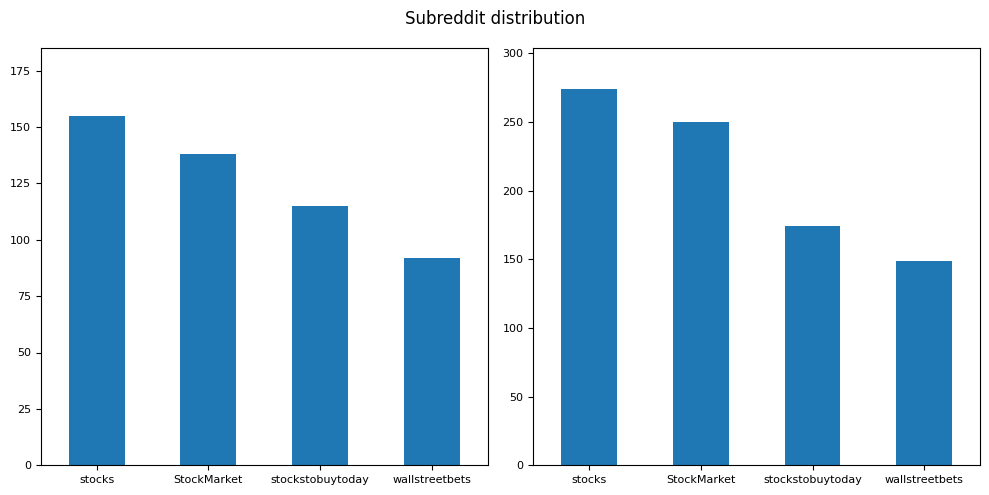

In [411]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns
df_sample['subreddit'].value_counts().plot(kind = 'bar',
                                    ylim = [0, df_sample['subreddit'].value_counts().max()+30],        
                                    rot = 0, fontsize = 8, ax = axes[0], xlabel = '')
df_stock['subreddit'].value_counts().plot(kind = 'bar',
                                    ylim = [0, df_stock['subreddit'].value_counts().max()+30],        
                                    rot = 0, fontsize = 8, ax = axes[1], xlabel = '')
fig.suptitle('Subreddit distribution')
plt.tight_layout()
plt.show()


<Axes: title={'center': 'Subreddit distribution'}>

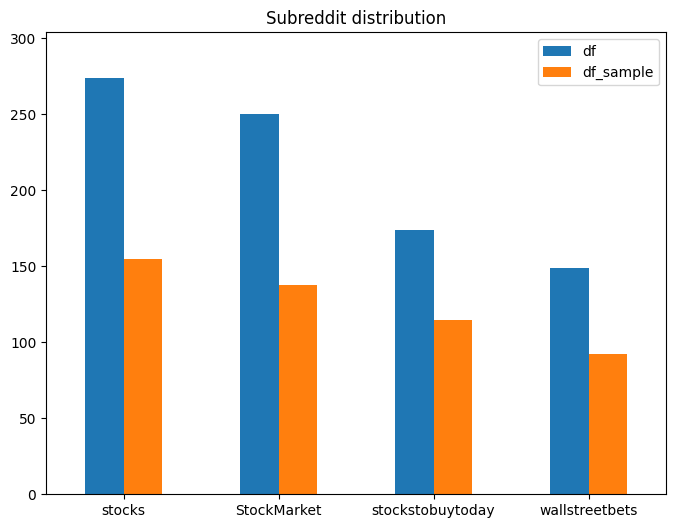

In [412]:
df_both = pd.DataFrame([df_stock['subreddit'].value_counts(),df_sample['subreddit'].value_counts()],index=['df','df_sample'])
df_both.T.plot(kind='bar',title='Subreddit distribution',ylim = [0,df_stock['subreddit'].value_counts().max()+30],figsize=(8,6),rot = 0,xlabel='')


#### Feature creation

obtain the **unigrams** for each text and obtain some statistics about the articles we have: something like word distribution or **word frequency**.

The tokenization using the `nltk` library

In [413]:
df_unique['unigrams'] = df_unique['text'].apply(lambda x: dmh.tokenize_text(x))
df_unique['unigrams'][:3]

0                                 [Calls, on, retards]
1    [Stunt, as, in, like, why, did, they, even, ma...
2          [Seeing, lots, of, red, in, the, ticker, .]
Name: unigrams, dtype: object

In [414]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(df_unique['text']) #learn the vocabulary and return document-term matrix
X_counts.shape

(826, 4346)

In [415]:
analyze = count_vect.build_analyzer()
print(analyze('This is 新的字串'))
count_vect.get_feature_names_out()[count_vect.transform(['This is 新的字串']).toarray().flatten() > 0]

['this', 'is', '新的字串']


array(['is', 'this'], dtype=object)

In [416]:
feat_index = count_vect.vocabulary_.get('calls')
X_counts_array = X_counts.toarray()
sum(X_counts_array[:,feat_index])

np.int64(14)

Text(95.72222222222221, 0.5, 'post_id')

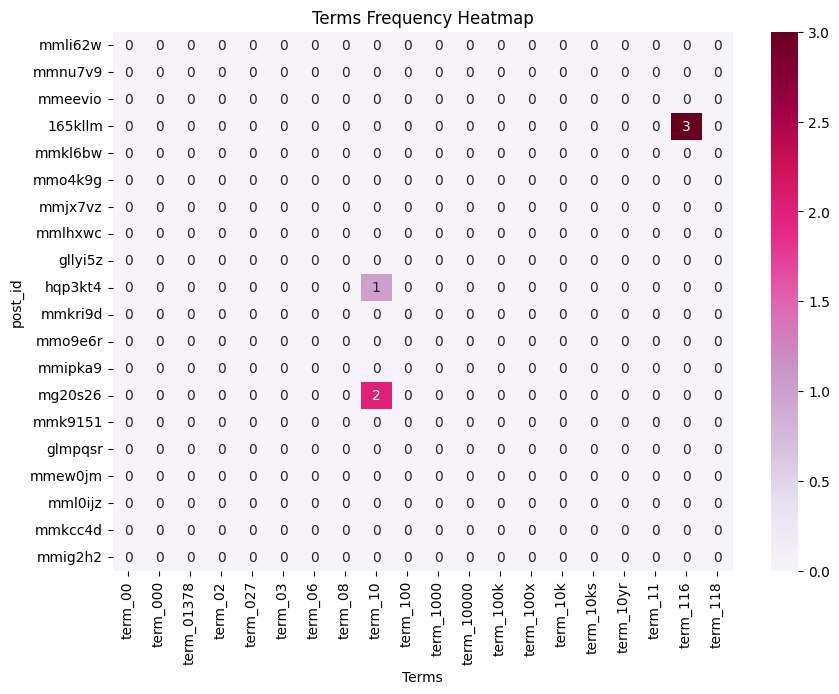

In [417]:
import seaborn as sns
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
plot_y = [df_unique[0:20]['post_id']]
plot_z = X_counts[0:20, 0:20].toarray() 

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(10, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, annot=True)
ax.set_title("Terms Frequency Heatmap")
ax.set_xlabel("Terms")
ax.set_ylabel("post_id")

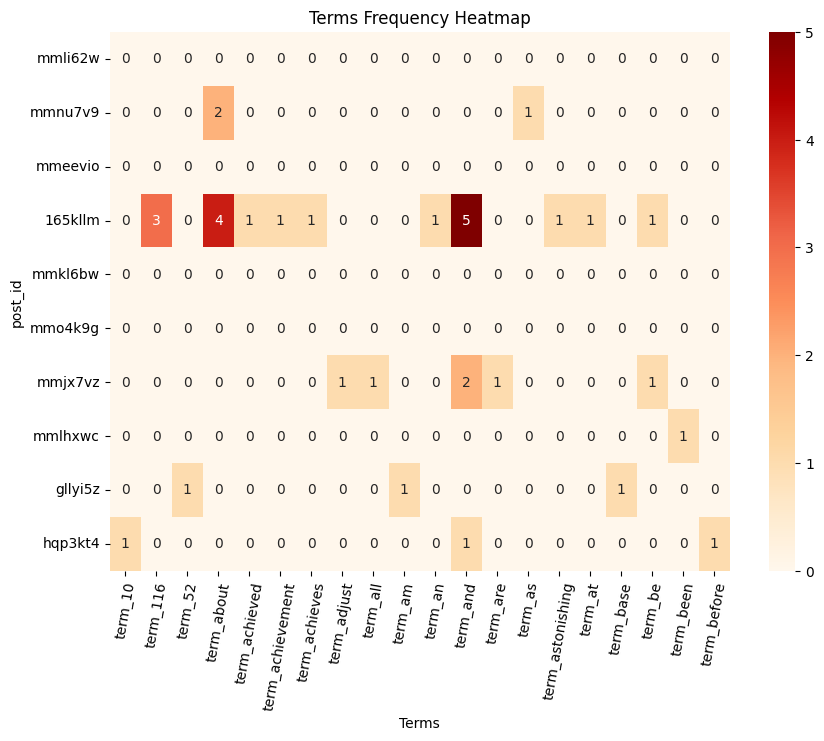

In [418]:
nonzero_terms = X_counts[:10].sum(axis=0).A1 > 0   # To get the terms that don't appear in docs, and A1 flattens to 1D array
X_nonzero = X_counts[:10, nonzero_terms]

plot_xx = "term_"+ count_vect.get_feature_names_out()[nonzero_terms][:20]
plot_yy = [df_unique[0:10]['post_id']]
plot_zz = X_nonzero[:,:20].toarray() 

df_heatmap = pd.DataFrame(plot_zz, columns = plot_xx, index = plot_yy)
plt.subplots(figsize=(10,7))
ax = sns.heatmap(df_heatmap,
                 cmap="OrRd",
                 vmin=0, annot=True)
ax.set_title("Terms Frequency Heatmap")
ax.set_xlabel("Terms")
ax.set_ylabel("post_id")
ax.set_xticklabels(plot_xx, rotation = 80);

#### Attribute transformation/ Aggregation

In [419]:
term_freq = np.asarray(X_counts.sum(axis=0))[0]

In [420]:
import plotly
import plotly.express as px

df_bar = pd.DataFrame({
    'terms': count_vect.get_feature_names_out()[:300],
    'freq': term_freq[:300]
})

fig = px.bar(df_bar,x='terms',y='freq',title="Frequency of First 300 Terms")
fig.update_layout(width=1000, height=500)
fig.show()

In [421]:
import plotly
import plotly.express as px

df_bar = pd.DataFrame({
    'terms': count_vect.get_feature_names_out(),
    'freq': term_freq
})

df_sorted = df_bar.sort_values('freq', ascending=False)  
fig = px.bar(df_sorted[:300], x='freq', y='terms', title="300 Most Frequent Terms")
fig.update_layout(yaxis={'categoryorder':'total ascending'},width=1000, height=500)  
fig.show()

Using log frequency

In [422]:
import math
term_freq_log = [math.log(x) for x in term_freq]

In [423]:
import plotly
import plotly.express as px

df_bar = pd.DataFrame({
    'terms': count_vect.get_feature_names_out()[:300],
    'log freq': term_freq_log[:300]
})

fig = px.bar(df_bar,x='terms',y='log freq',title="Log Frequency of First 300 Terms")
fig.update_layout(width=1000, height=500)
fig.show()

In [424]:
import plotly
import plotly.express as px

df_bar = pd.DataFrame({
    'terms': count_vect.get_feature_names_out(),
    'log freq': term_freq_log
})

df_sorted = df_bar.sort_values('log freq', ascending=False)  
fig = px.bar(df_sorted[:300], x='terms', y='log freq', title="300 Most Frequent Terms")
fig.update_layout(width=1000, height=500)  
fig.show()

## Third Part
- Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 

### Plot distribution of terms in text appearing on different Subreddits

In [425]:
# Group the doc-term matrix by 'subreddit'
subreddit_category = df_unique['subreddit'].unique()
print(subreddit_category)
term_freq_subreddit = { x: X_counts[ df_unique['subreddit'] == x ].sum(axis=0).A1 for x in subreddit_category}
term_freq_subreddit['wallstreetbets']
term_prob_subreddit = { x: y/sum(y) for x,y in term_freq_subreddit.items()}
term_prob = term_freq/sum(term_freq)

['wallstreetbets' 'StockMarket' 'stockstobuytoday' 'stocks']


In [426]:
print(f"{'subreddit':25} terms_count")
for x in subreddit_category:
    print(f"{x:25} {sum(term_freq_subreddit[x])}")

subreddit                 terms_count
wallstreetbets            2249
StockMarket               5232
stockstobuytoday          4335
stocks                    8726


**以下四個直方圖分別呈現"出現頻率最高的70個Terms"在"不同subreddit的貼文或留言中"的機率，並加上橘色線條描繪這些Frequent Terms整體的出現機率。**
想了解出現頻率高的一些字詞是否在某些subreddit上較常出現，首先知道stocks有最多terms(8000+),其次是StockMarket(5000+),stockstobuytoday(4000+),最後是wallstreetbets(2000+)。例如：觀察在stockstobuytoday圖上，字詞'on', 'with', 'market', 'some'出現機率比平均值(橘色線)高許多，在其他subreddit上則沒有。在StockMarketW圖上則是'they', 'he', 'trump', 'his', 'china'出現機率明顯較高。Terms數量最多的stocks的字詞分布與平均大致接近，而Terms數量最少的wallstreetbets則是沒有發現特殊字詞的出現機率較突出。

In [427]:
import plotly
import plotly.express as px
import plotly.graph_objects as pg

for x,y in term_prob_subreddit.items():
    df_bar = pd.DataFrame({
        'terms': count_vect.get_feature_names_out(),
        'freq_subreddit': y,
        'freq': term_prob
    })
    df_sorted = df_bar.sort_values('freq', ascending=True)  
    df_top = df_sorted[-70:]
    fig = px.bar(df_top, x='freq_subreddit', y='terms', title=f"Dist. of 50 Most Frequent Terms in subreddit = '{x}'")
    
    # add line (overall distribution of 50 most frequent terms)
    fig.add_trace(
        pg.Scatter(
            x=df_top['freq'], 
            y=df_top['terms'], 
            mode='lines+markers', 
            name='Overall Dist.',
            line=dict(color='orange')
        )
    )
    fig.update_layout(width=1000, height=600)
    fig.update_xaxes(range=[0, 0.053])
    fig.show()

**另外畫"給定不同subreddit"中"出現頻率最高的40個Terms"的分布如下，可以和上圖做比較，在這四個subreddits中出現的Terms大多是相似的**

In [428]:
import plotly
import plotly.express as px
for x,y in term_freq_subreddit.items():
    df_bar = pd.DataFrame({
        'terms': count_vect.get_feature_names_out(),
        'freq': y
    })
    df_sorted = df_bar.sort_values('freq', ascending=False)  
    fig = px.bar(df_sorted[:40], x='terms', y='freq', title=f"40 Most Frequent Terms in subreddit = '{x}'")
    fig.update_layout(width=1200, height=400)  
    fig.show()

### Compare the distribution of Subjectivity and Polarity

**以下直方圖展示Subjectivity的整體分布**，可以發現大多數的貼文或留言的主觀性都是最低(=0.0)，其他主觀程度的分布則較為平均，但以1.0(最主觀)和0.4至0.6的值居多。

826


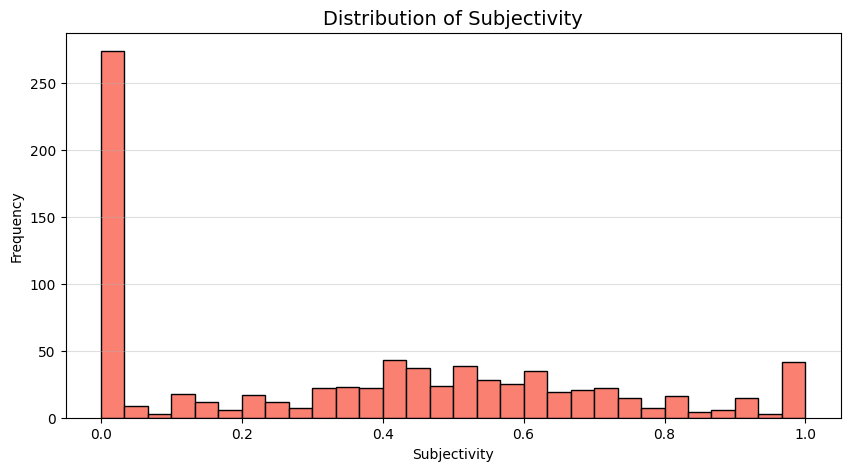

In [429]:
plt.figure(figsize=(10,5))
print(len(df_unique['subjectivity']))
plt.hist(df_unique['subjectivity'], bins=30, color='salmon', edgecolor='black')
plt.title("Distribution of Subjectivity", fontsize=14)
plt.xlabel("Subjectivity")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.4)
plt.show()

**以下直方圖展示Polarity的整體分布**，可見大多數的貼文或留言的極性都是0.0，也就是沒有表達正面或負面態度，整體分布也以接近中立的數量較多(-0.25至0.25)，正面略多於負面，但表達程度越極端的數量較少。

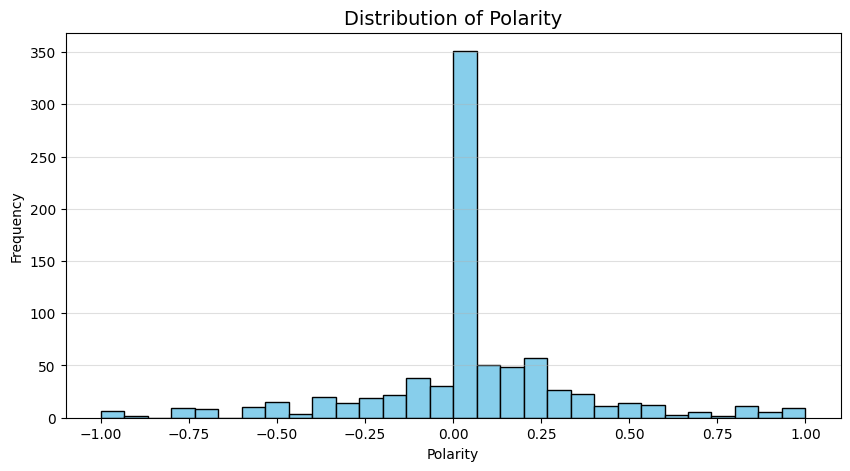

In [430]:
plt.figure(figsize=(10,5))
plt.hist(df_unique['polarity'], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Polarity", fontsize=14)
plt.xlabel("Polarity")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.4)
plt.show()

**觀察以下散佈圖可發現**，Polarity與Sentiment有明顯相互對應，即正數則Sentiment為1.0，反之則為-1.0，中間零值則歸為0.0。
Subjectivity越大(越強烈表達主觀意見)的貼文或留言的Polarity分布越分散。
再觀察以下分布密度圖，深紅色範圍表示大多數表達中立的貼文或留言是較為客觀的意見，稍微主觀的意見中也是表達中立態度較多(略白色範圍)，但有逐漸趨向表達正面或負面態度。

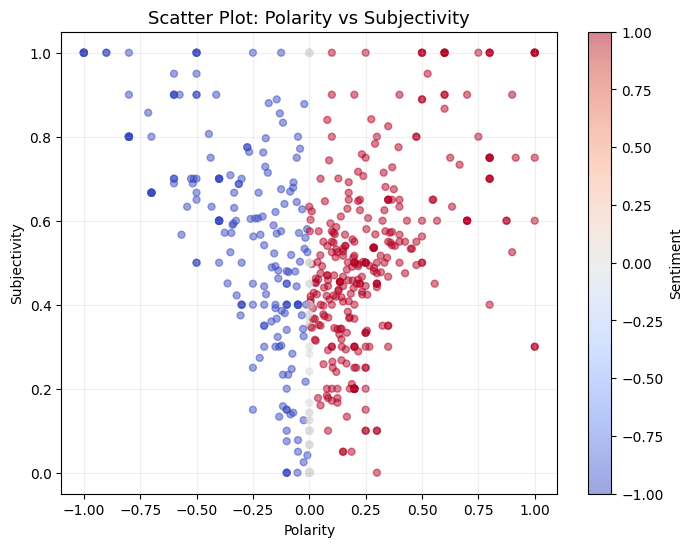

In [431]:
plt.figure(figsize=(8,6))
plt.scatter(df_unique['polarity'], df_unique['subjectivity'], 
            alpha=0.5, s=25, c=df_unique['sentiment'], cmap='coolwarm')

plt.title("Scatter Plot: Polarity vs Subjectivity", fontsize=13)
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.colorbar(label="Sentiment")
plt.grid(alpha=0.2)
plt.show()

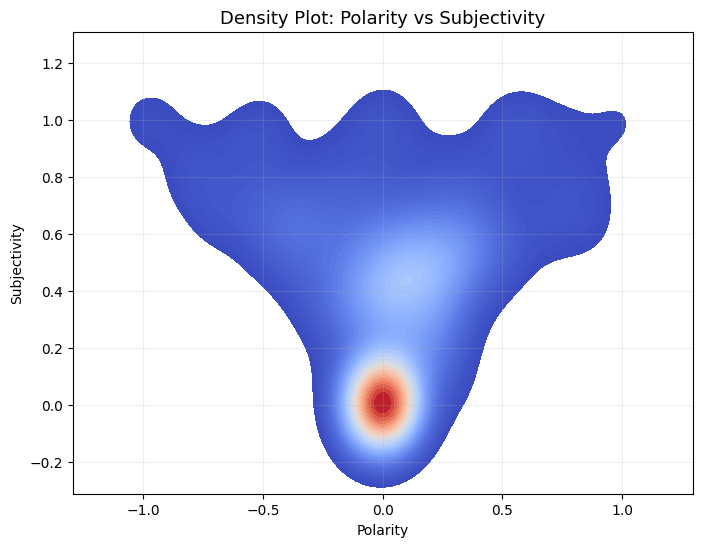

In [432]:
plt.figure(figsize=(8,6))
sns.kdeplot(
    data = df_unique,
    x='polarity', 
    y='subjectivity', 
    fill=True, 
    thresh=0.05, 
    levels=50,
    cmap = 'coolwarm'
)
plt.title("Density Plot: Polarity vs Subjectivity", fontsize=13)
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.grid(alpha=0.2)
plt.show()


**觀察不同subreddit類別中的Subjectivity和Polarity的散布情況**。在stockstobuytoday的類別中，強烈主觀的表達很少，而大多數評論態度中立(Sentiment=0)，持負面態度的數量偏少。在wallstreetbets的類別中，偏向正面(Polarity>0)而態度稍微客觀的數量多於負面的。在StockMarket和stocks類別中，評論態度大多集中在中立(Polarity接近0)稍微客觀表達，負面態度少於正面態度的評論，分布與整體狀況較接近。

sentiment
 1.0    60
 0.0    59
-1.0    30
Name: count, dtype: int64


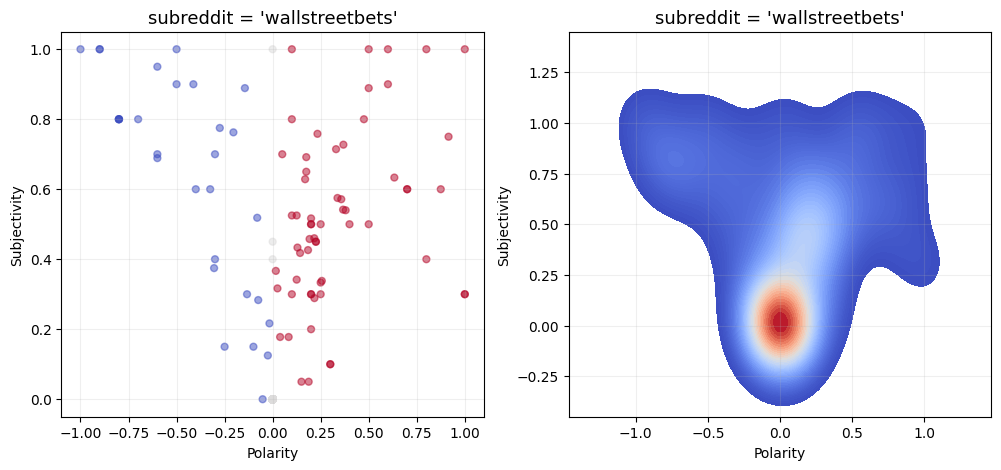

sentiment
 1.0    96
 0.0    82
-1.0    72
Name: count, dtype: int64


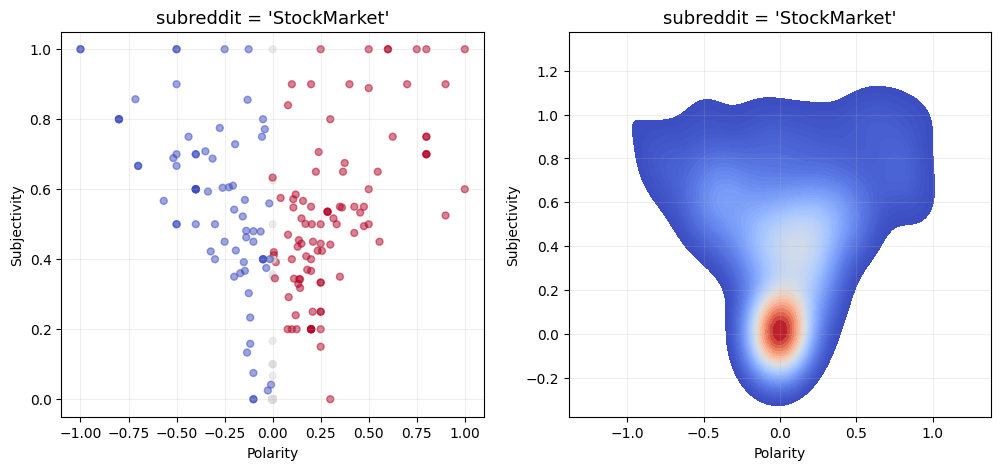

sentiment
 0.0    86
 1.0    53
-1.0    14
Name: count, dtype: int64


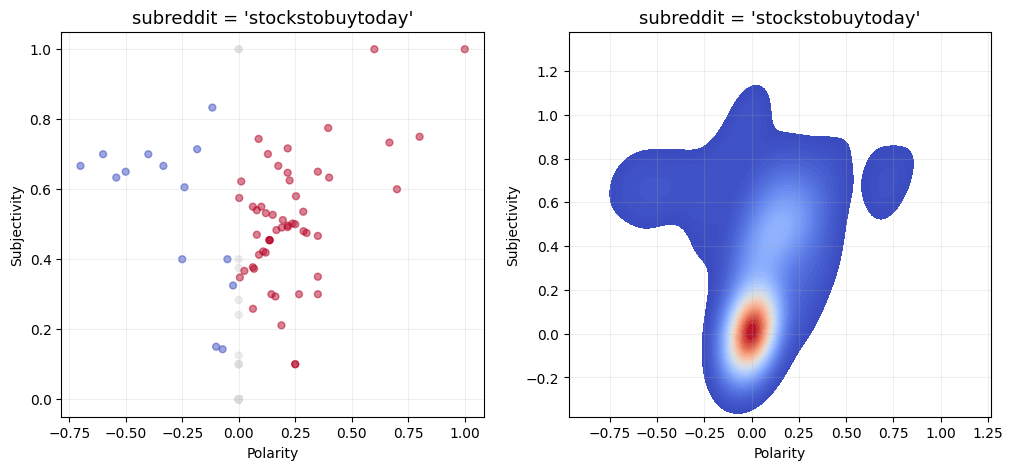

sentiment
 1.0    107
 0.0     86
-1.0     81
Name: count, dtype: int64


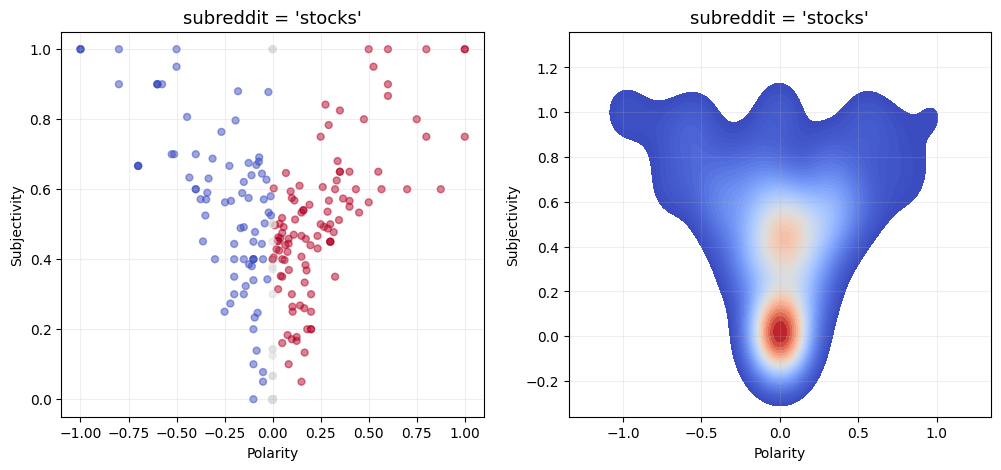

In [433]:
df_sub = {x: df_unique[ df_unique['subreddit'] == x ] for x in subreddit_category}

for sub,X in df_sub.items():
    print(X['sentiment'].value_counts())
    fig, axes = plt.subplots(1, 2, figsize=(12,5))
    axes[0].scatter(X['polarity'], X['subjectivity'], 
                alpha=0.5, s=25, c=X['sentiment'], cmap='coolwarm')
    axes[0].set_title(f"subreddit = '{sub}'", fontsize=13)
    axes[0].set_xlabel("Polarity")
    axes[0].set_ylabel("Subjectivity")
    axes[0].grid(alpha=0.2)
    sns.kdeplot(
        data = X,
        x='polarity', 
        y='subjectivity', 
        fill=True, 
        thresh=0.05, 
        levels=50,
        cmap = 'coolwarm'
    )
    axes[1].set_title(f"subreddit = '{sub}'", fontsize=13)
    axes[1].set_xlabel("Polarity")
    axes[1].set_ylabel("Subjectivity")
    axes[1].grid(alpha=0.2)
    plt.show()
    

### The distribution of Entities mentioned in different Sentiments.

In [434]:
# learn the entities and return document-term matrix
count_vect_entities = CountVectorizer()
X_counts = count_vect_entities.fit_transform(df_unique['entities']) 

**繪製堆疊長條圖，可以觀察"整體出現次數最多的40個Entities"分別"在不同Sentiment的貼文或留言中出現的次數"**，例如：'economy', 'dollar', 'company','term'等在sentiment=0時的出現次數比例極低，可見絕大多數相關評論持非中立的意見。

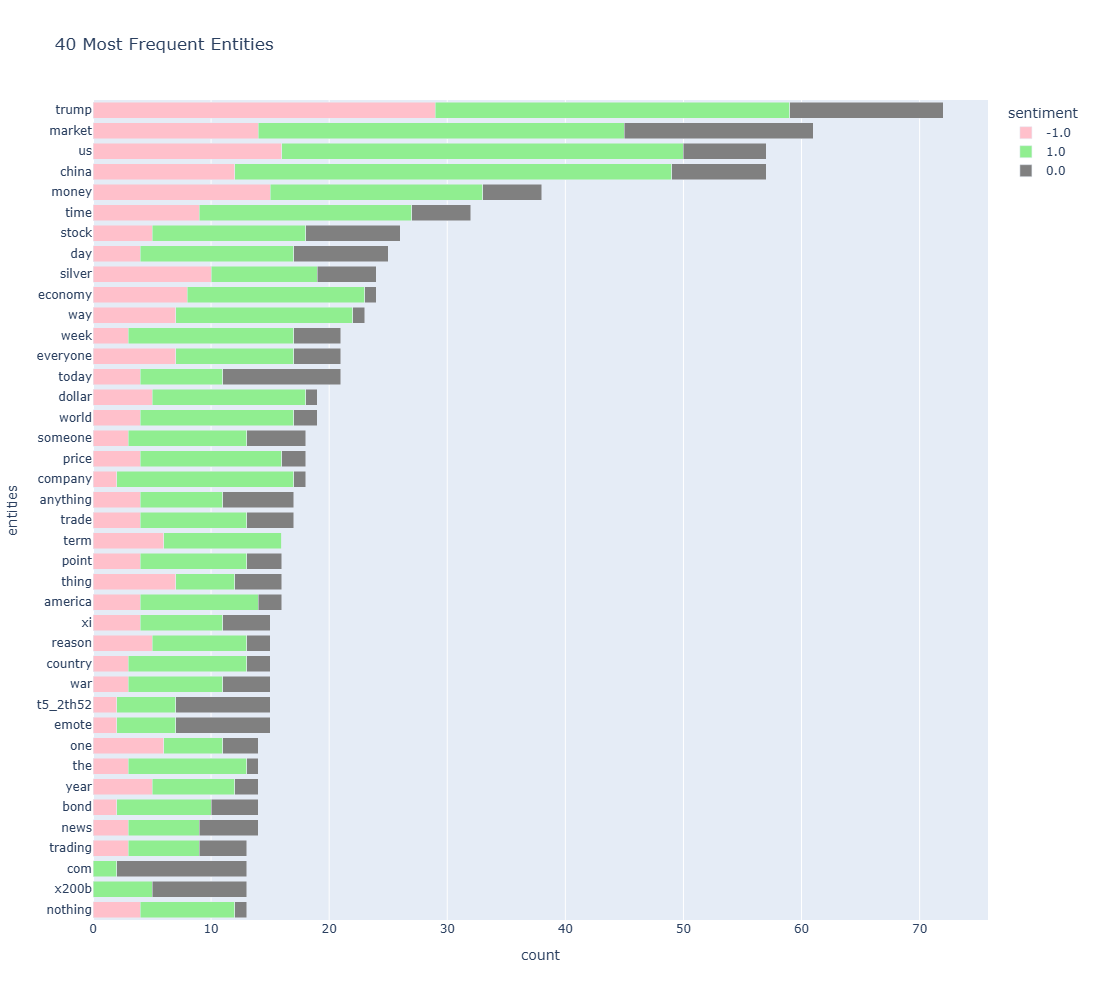

In [435]:
import plotly
import plotly.express as px
term_freq_sent = { x: X_counts[ df_unique['sentiment'] == x ].sum(axis=0).A1 for x in df_unique['sentiment'].unique()}

df_bar = pd.DataFrame({
    'entities': count_vect_entities.get_feature_names_out(),
    'freq': X_counts.sum(axis=0).A1,
} | term_freq_sent)

# Keep only top 40 terms by total frequency
df_top = df_bar.sort_values('freq', ascending=True)[-40:]
df_melt = df_top.melt(
    id_vars=['entities'], 
    value_vars=[s for s in term_freq_sent.keys()], 
    var_name='sentiment', 
    value_name='count'
)

fig = px.bar(
    df_melt,
    x="count",
    y="entities",
    color="sentiment",
    barmode="stack",
    title="40 Most Frequent Entities",
    color_discrete_map={-1: "pink", 0: "gray", 1: "lightgreen"}
)
fig.update_layout(width=800, height=1000)
fig.show()

**繪製"給定不同Sentiment"時，出現次數最多的40個Entities出現的次數分布堆疊長條圖**，首先看Sentiment=-1.0的圖，發現一些Entities如'fuck', 'shit', 'man', 'congress', 'idiot', 'retard', 'insane', 'leader'等在負面態度中的出現次數極高，可知有這些Entities的貼文或留言經常被歸類為負面言論。在Sentiment=1.0的圖中則是Entities如'company', 'portfolio', 'hey', 'risk', 'technology'等在正面態度中的出現次數極高。而在Sentiment=0的圖中可以發現，大多數Entities出現在非中立態度(Sentiment不為0)的評論中，少數Entities如'stockbyvest', 'com', 'amc', 'daily'等才容易出現在歸類為中立態度的言論。

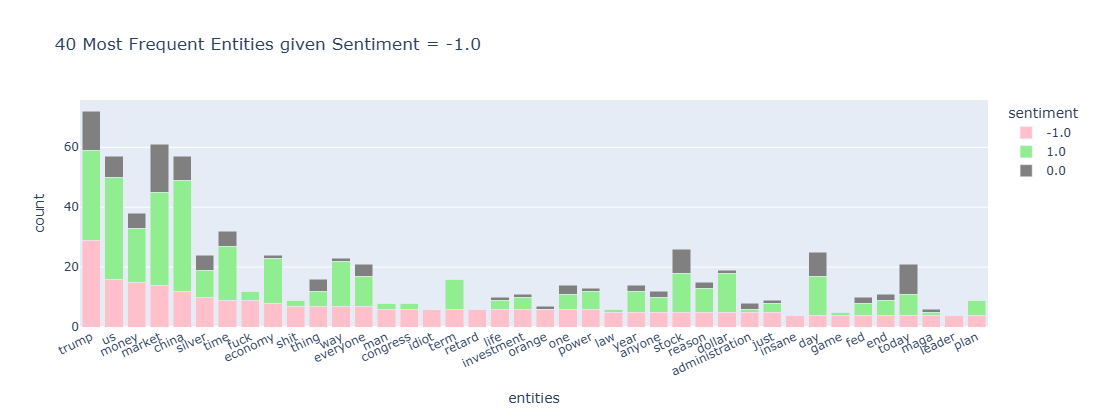

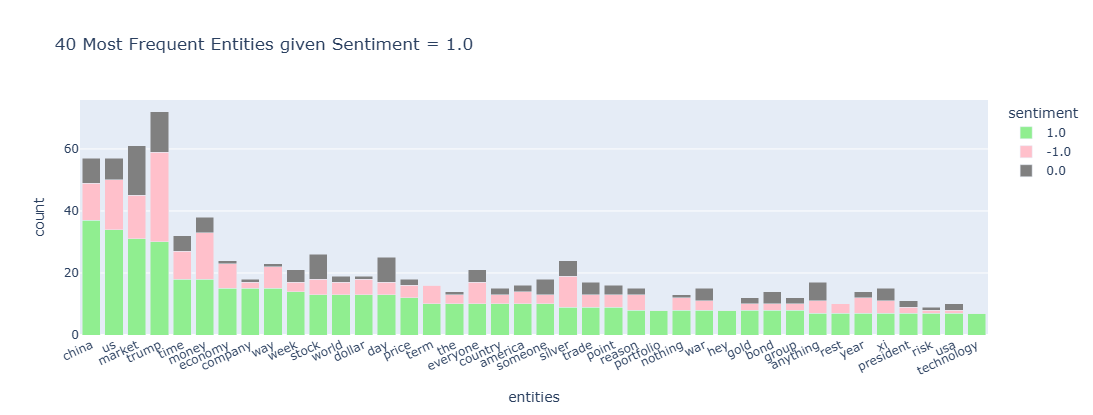

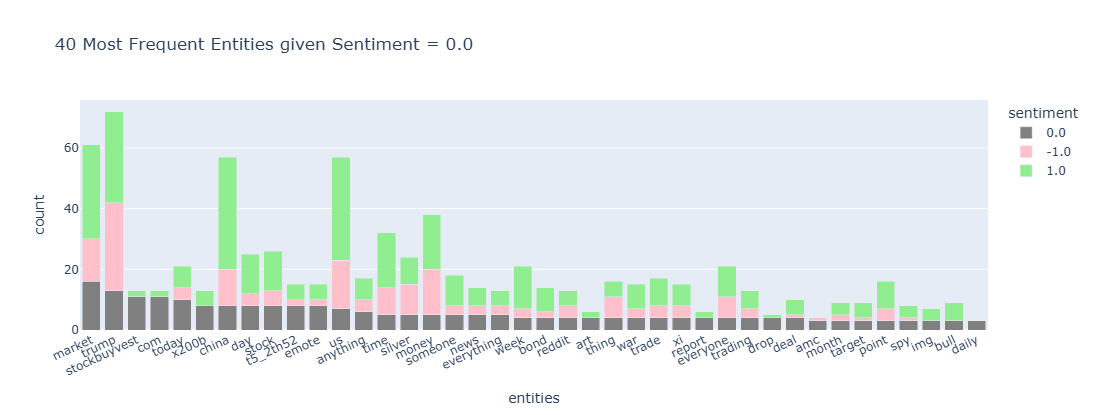

In [436]:
import plotly
import plotly.express as px
for x,y in term_freq_sent.items():
    df_bar = pd.DataFrame({
        'entities': count_vect_entities.get_feature_names_out(),
        'freq': X_counts.sum(axis=0).A1,
        x: y,
    } | term_freq_sent)
    
    df_top = df_bar.sort_values(x, ascending=False)[:40]
    df_melt = df_top.melt(
        id_vars=['entities'], 
        value_vars=[x]+[s for s in term_freq_sent.keys() if s != x], 
        var_name='sentiment', 
        value_name='count')
    fig = px.bar(
        df_melt,
        y="count",
        x="entities",
        color="sentiment",
        barmode="stack",
        title=f"40 Most Frequent Entities given Sentiment = {x}",
        color_discrete_map={-1: "pink", 0: "gray", 1: "lightgreen"}
    )
    fig.update_layout(width=1300, height=400,xaxis_tickangle=-25)
    fig.show()

# Phase 2

In [ ]:
### Begin Assignment Here